In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC  
from sklearn.ensemble import ExtraTreesClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
import warnings; warnings.simplefilter('ignore')

In [2]:
dataset = pd.read_csv("mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


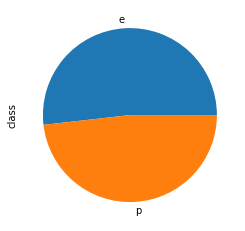

In [3]:
dataset['class'].value_counts(normalize=True).plot.pie()

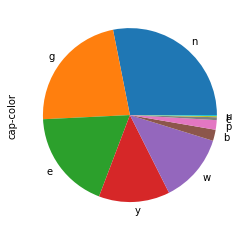

In [4]:
dataset['cap-color'].value_counts(normalize=True).plot.pie()

In [5]:
#Drop nan values
dataset = dataset.dropna(how='any',axis=0) 

In [6]:
#encode
encode_data = dataset.apply(LabelEncoder().fit_transform)
X = encode_data.iloc[:, 1:23].values
y = encode_data.iloc[:, 0].values



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
 import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

In [9]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=dataset, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

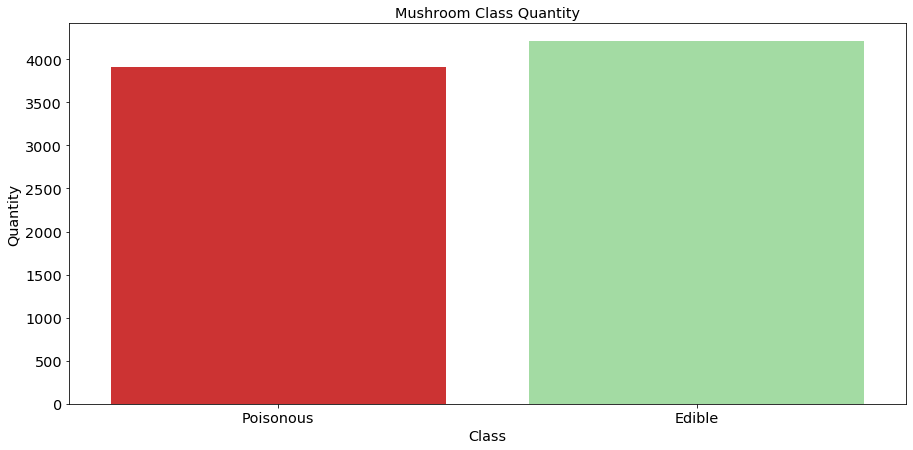

In [10]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

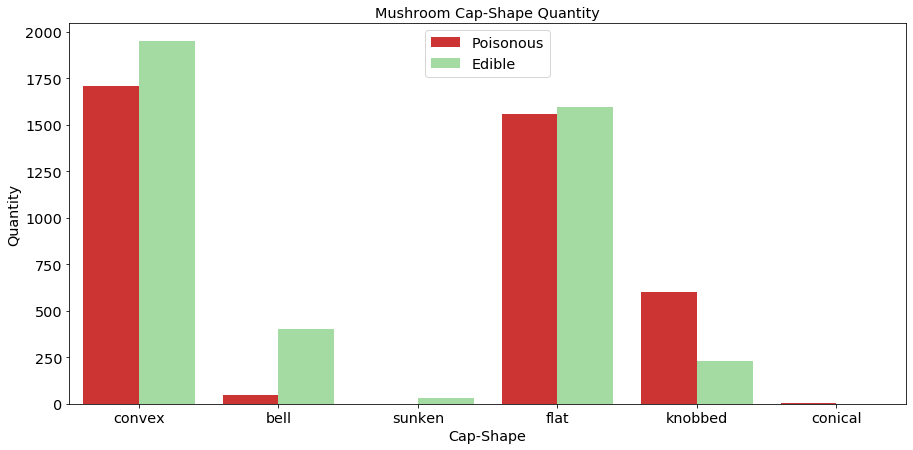

In [11]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

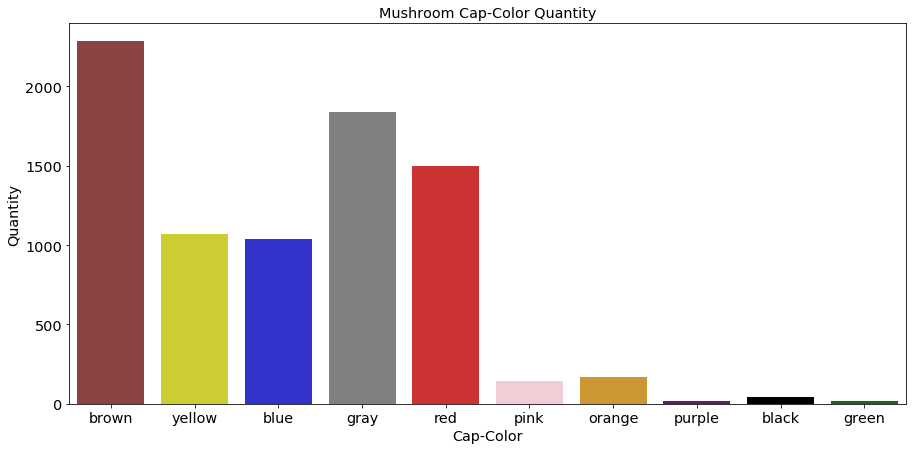

In [12]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)


In [13]:
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = encode_data[stalk_cats]
 

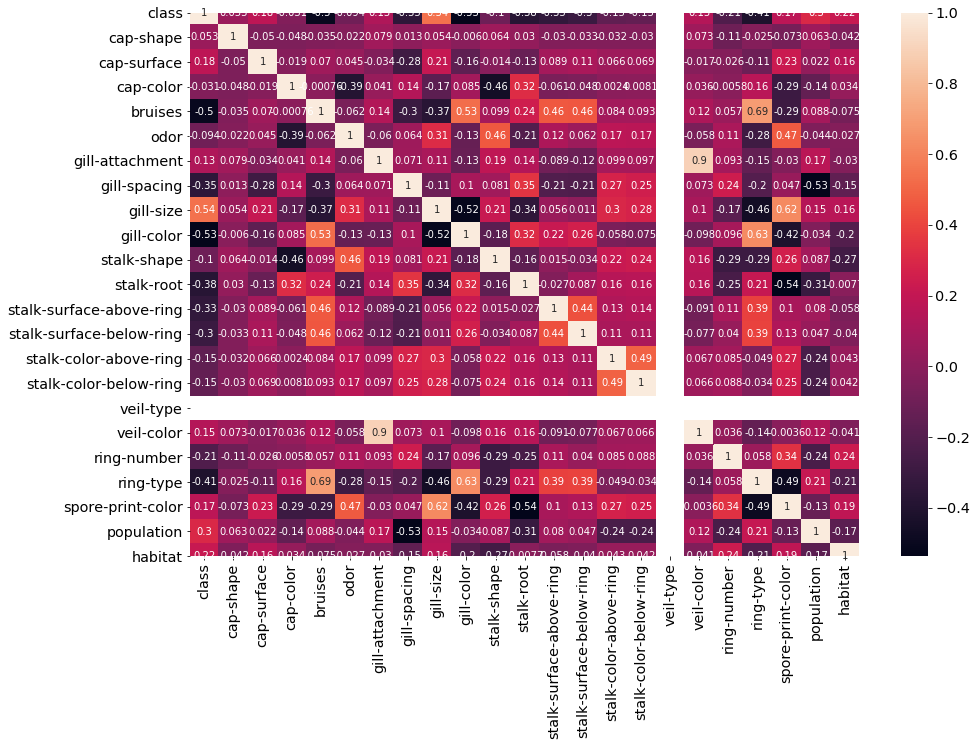

In [14]:
corr = encode_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [15]:
pop_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
hab_dict = {"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}
 

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
 

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
clf = PCA(0.5)  
clf.fit(X,y)
X_pca = clf.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
print("original:   ", X[0])
print("transformed :", X_pca[0])

original shape:    (8124, 22)
transformed shape: (8124, 4)
original:    [ 1.02971224  0.14012794 -0.19824983  1.18591657  0.88193766  0.16289645
 -0.43886364  1.49468272 -0.22899776 -1.14480575  1.78146019  0.68377765
  0.58638466  0.62244139  0.63199138  0.          0.14203663 -0.25613174
  0.94808086 -0.67019486 -0.5143892   2.03002809]
transformed : [-0.5743219  -0.97578135 -1.22176154  0.18550515]


In [23]:
# your code here
from sklearn.model_selection import learning_curve
def plot_learning_curve(model,X, y):
    N, train_lc, val_lc = learning_curve(model,X, y, cv=7,train_sizes=np.linspace(0.3, 1, 25), scoring="f1")

    plt.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    plt.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    plt.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')
    plt.xlabel('training size')
    plt.ylabel('score')
    plt.legend(loc='best')
    
def train_and_test(classifier, X_train, X_test, y_train, y_test):
    history=classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_score = classifier.predict_proba(X_test)[:,1]
    
    accuracy=accuracy_score(y_test,y_pred)
    roc_auc=roc_auc_score(y_test,y_score)
    classification_rep=classification_report(y_test,y_pred)
    con_matrix=confusion_matrix(y_test,y_pred)
    fpr ,tpr ,_=roc_curve(y_test,y_pred)  

    # ploting confustion matrix
    plt.figure(figsize=(12,12))
    plt.subplot(2,1,1)
    sns.heatmap(con_matrix, annot=True, fmt="d", xticklabels="Y", yticklabels="Y")
    plt.ylabel("Real value")
    plt.xlabel("Predicted value")
    plt.show()

    # print scores
    print ("accuracy  score: {} %".format(accuracy))
    print ("auc  score: {} ".format(roc_auc))
    print(classification_rep)

    # print ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [24]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y,train_size=0.75,test_size=0.25, random_state=44) 

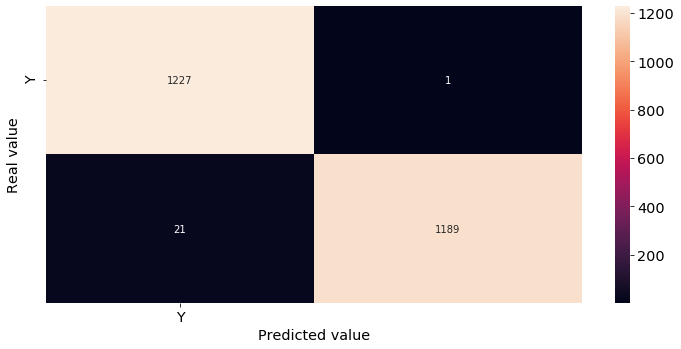

accuracy  score: 0.9909762100082035 %
auc  score: 0.9976579535359518 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1228
           1       1.00      0.98      0.99      1210

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



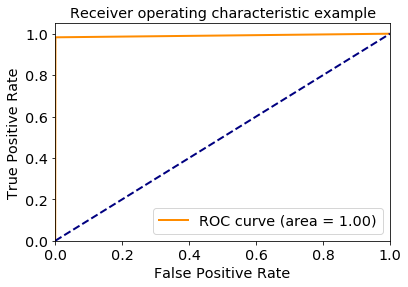

In [25]:
DecisionTree = ExtraTreesClassifier(n_estimators = 4)
train_and_test(DecisionTree, X_train_pca, X_test_pca, y_train, y_test)

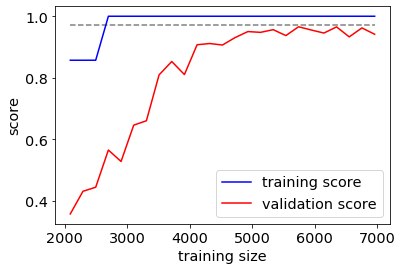

In [26]:
plot_learning_curve(DecisionTree,X_pca, y)

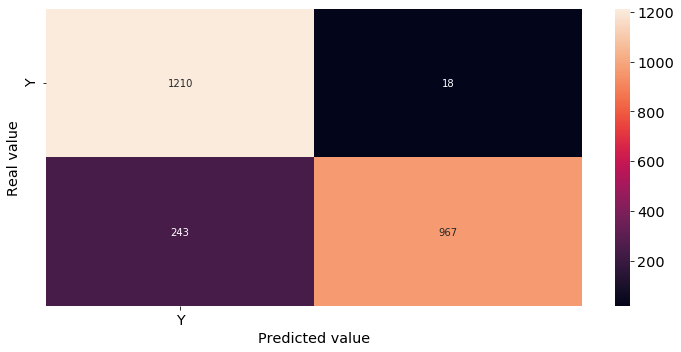

accuracy  score: 0.8929450369155045 %
auc  score: 0.9721585861576978 
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1228
           1       0.98      0.80      0.88      1210

    accuracy                           0.89      2438
   macro avg       0.91      0.89      0.89      2438
weighted avg       0.91      0.89      0.89      2438



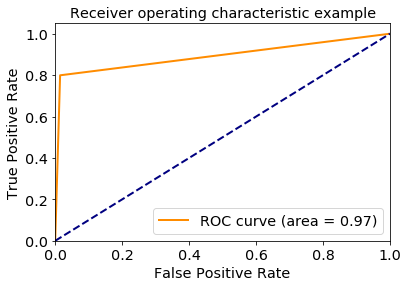

In [27]:
svm = SVC(C=0.01,probability=True)
train_and_test(svm, X_train_pca, X_test_pca, y_train, y_test) 